In [16]:
#!pip install pydotplus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
#from sklearn.externals.six import StringIO
from sklearn.tree import plot_tree
from IPython.display import Image
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor

In [12]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=17)
dt = DecisionTreeRegressor(random_state=0).fit(X_train,y_train)

## Question 1. 

Définir une fonction tree_summary qui prend un argument un arbre de décision entraîné et qui affiche son score d’apprentissage, son score de test, sa profondeur et son nombre de nœuds. Appliquer cette fonction à l’arbre dt construit ci-dessus. Commenter les résultats.

On peut limiter la profondeur de l’arbre à l’aide de l’argument max_depth.

In [13]:
def tree_summary(arbre):
    score_apprentissage = dt.score(X_train, y_train)
    score_test = dt.score(X_test, y_test)
    profondeur = arbre.tree_.max_depth
    nb_noeuds = arbre.tree_.node_count
    print("Le score d'apprentissage est : ", score_apprentissage)
    print("Le score de test est : ", score_test)
    print("La profondeur de l'arbre est : ", profondeur)
    print("Le nombre de noeuds de l'arbre est : ", nb_noeuds)
    return score_apprentissage, score_test, profondeur, nb_noeuds

tree_summary(dt)

Le score d'apprentissage est :  1.0
Le score de test est :  0.8326570877247362
La profondeur de l'arbre est :  17
Le nombre de noeuds de l'arbre est :  715


(1.0, 0.8326570877247362, 17, 715)

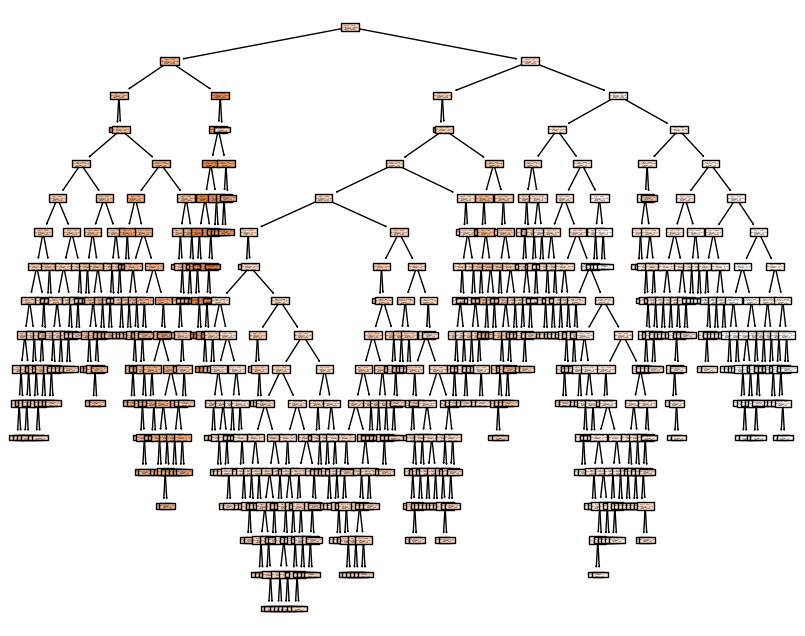

In [18]:
plt.figure(figsize=(10, 8))
plot_tree(dt, filled=True)
plt.show()

## Question 2. — 

Entraîner un arbre de décision, nommé dt2, dont la profondeur est limitée à 3. Observer ses scores et ses caractéristiques. Commenter.

Le score d'apprentissage est :  1.0
Le score de test est :  0.8326570877247362
La profondeur de l'arbre est :  3
Le nombre de noeuds de l'arbre est :  15


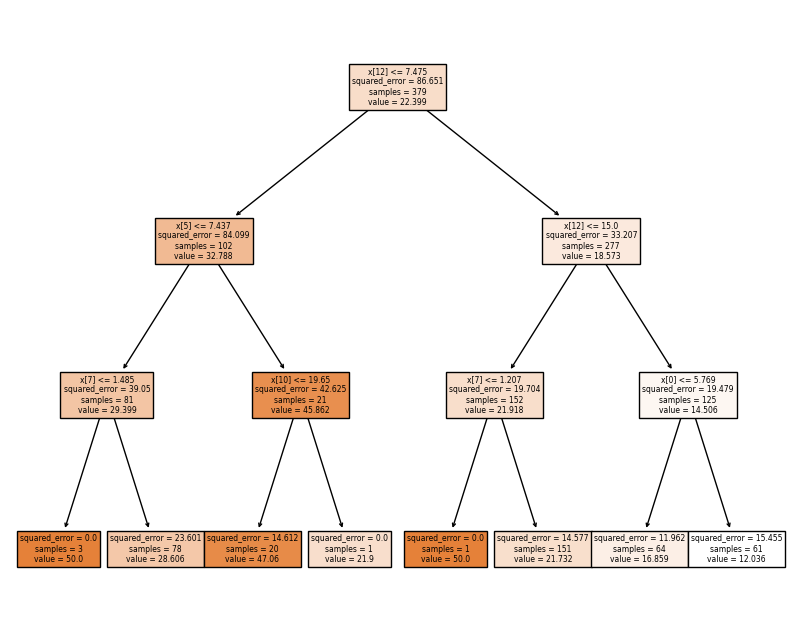

In [19]:
dt2 = DecisionTreeRegressor(random_state=0, max_depth=3).fit(X_train,y_train)
tree_summary(dt2)


plt.figure(figsize=(10, 8))
plot_tree(dt2, filled=True)
plt.show()

## Question 3. — 

Quelles sont les variables explicatives qui interviennent dans l’arbre de décision dt2?

Réponse : x[12], x[5], x[7], x[10], x[0]